### El siguiente proyecto tiene como fin realizar una práctica sobre  diferentes herramientas para el análisis y exploracion de datos, y el tratamiento de datos faltantes.

###### Análisis de la Violencia de Genero en el transcurso de los últimos años en Argentina

Se llevará a cabo un análisis de las estadísticas relacionadas a la **violencia de genero** en la *República Argentina*, a fin de conocer cuál es la problemática actual en cada provincia, su evolución a lo largo del tiempo, las características de población afectada, y demás atributos.

El data set a utilizar es el obtenido desde el **Ministerio de Justicia y Derechos Humanos de la Nación Argentina** 
*versión 2019-01-09*

Fuente:
http://datos.jus.gob.ar/dataset/registro-sistematizacion-y-seguimiento-de-femicidios-y-homicidios-agravados-por-el-genero

Documentación:
https://github.com/datos-justicia-argentina/Registro-sistematizacion-y-seguimiento-de-femicidios-y-de-homicidios-agravados-por-el-genero/blob/master/Registro-sistematizacion-y-seguimiento-de-femicidios-y-de-homicidios-agravados-por-el-genero-metadata.md


                                                                                Proyecto realizado por Matias Scorsetti

Comenzamos por cargar el data set y analizar su contenido

In [1]:
# importamos bibliotecas a utilizar
import numpy as np    
import pandas as pd
import seaborn as sns
import scipy.stats as stats

In [2]:
# cargamos el archivo 
df = pd.read_csv('registro-de-femicidios-2019-01-09.csv', parse_dates=['hecho_fecha'])
df.index.name = 'index'
df.sample(5)

,caso_numero,victima_edad,victima_identidad_genero,victima_tipo,hecho_provincia,hecho_modalidad_comisiva,hecho_fecha,fuente_tipo,fuente_link,hecho_provincia_indec_id
index,,,,,,,,,,
10,18,44.0,MUJER,PRINCIPAL,Ciudad Autónoma de Bs.As.,NaN,2015-02-24,MEDIO COMUNICACIÓN,https://www.diariopopular.com.ar/policiales/pr...,2.0
507,659,25.0,MUJER,PRINCIPAL,Salta,DISPARO DE BALA,2016-04-02,MEDIO COMUNICACIÓN,http://www.solonoticiasalta.com.ar/el-policia-...,66.0
912,1119,44.0,MUJER,PRINCIPAL,Buenos Aires,APUÑALAMIENTO,2018-05-10,MEDIO COMUNICACIÓN,http://www.elpopular.com.ar/eimpresa/279866/in...,6.0
974,1176,47.0,MUJER,VINCULADO,Mendoza,ACUCHILLAMIENTO,2018-07-22,MEDIO COMUNICACIÓN,https://www.clarin.com/sociedad/triple-femicid...,50.0
468,618,11.0,MUJER,VINCULADO,Buenos Aires,GOLPES,2016-03-17,MEDIO COMUNICACIÓN,http://diariohoy.net/trama-urbana/pidieron-la-...,6.0


In [3]:
# cantidad de filas y columnas
df.shape

(1233, 10)

In [4]:
# renombramos la columna para identificarla como provincia en Tableau
df = df.rename(columns={'hecho_provincia':'province'}) 
df.sample()

,caso_numero,victima_edad,victima_identidad_genero,victima_tipo,province,hecho_modalidad_comisiva,hecho_fecha,fuente_tipo,fuente_link,hecho_provincia_indec_id
index,,,,,,,,,,
719,893,21.0,MUJER,PRINCIPAL,Córdoba,ESTRANGULAMIENTO,2017-04-22,MEDIO COMUNICACIÓN,http://tn.com.ar/policiales/tamara-la-chica-qu...,14.0


In [5]:
# no utilizamos los datos respecto al tipo de fuente y el link de la misma
df.drop(['fuente_tipo','fuente_link'], axis=1, inplace=True)
df.sample()

,caso_numero,victima_edad,victima_identidad_genero,victima_tipo,province,hecho_modalidad_comisiva,hecho_fecha,hecho_provincia_indec_id
index,,,,,,,,
1025,1225,29.0,MUJER,PRINCIPAL,Misiones,ACUCHILLAMIENTO,2018-09-16,54.0


In [6]:
# verificamos los datos faltantes
df.isna().sum()

caso_numero                   0
victima_edad                 54
victima_identidad_genero     64
victima_tipo                  0
province                     58
hecho_modalidad_comisiva    119
hecho_fecha                   0
hecho_provincia_indec_id     62
dtype: int64

Observamos que existen datos faltantes en la **edad, genero, provincia, modalidad, e id de provincia**. A continuación, pasaremos a abordar cada uno de los problemas.

Comenzaremos entonces por la variable **edad**, primero observamos cómo se distribuye la edad de las victimas

C:\Users\Pc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


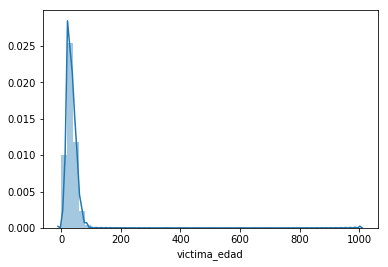

In [7]:
# distribucion de la edad 
sns.distplot(df.victima_edad.dropna());

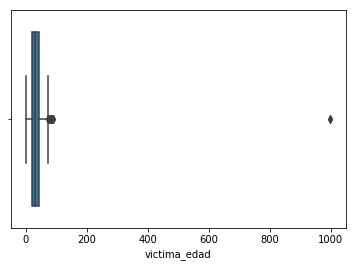

In [8]:
sns.boxplot(df.victima_edad.dropna());

Como se puede observar en la gráfica, existen datos anormales, ya que una persona no podría tener alrededor de 1000 años.
debido a ello considero adecuado filtrar los datos que superen los 100 años de edad

In [9]:
# veamos la cantidad de edades anormales, que superan los 100 años
df.victima_edad[df.victima_edad>100].count()

2

In [10]:
# y la cantidad de edades faltantes 
df.victima_edad.isna().sum()

54

Analizamos entonces como se distribuye de la variable **edad**, sin tener en cuenta los valores anormales o faltantes

In [11]:
df[df.victima_edad<100].sample(5)

,caso_numero,victima_edad,victima_identidad_genero,victima_tipo,province,hecho_modalidad_comisiva,hecho_fecha,hecho_provincia_indec_id
index,,,,,,,,
807,987,20.0,MUJER,PRINCIPAL,Santa Fe,DISPARO DE BALA,2017-08-19,82.0
160,193,23.0,MUJER,PRINCIPAL,Buenos Aires,ACUCHILLAMIENTO,2015-07-30,6.0
47,74,34.0,MUJER,PRINCIPAL,Buenos Aires,NaN,2013-07-06,6.0
96,147,50.0,MUJER,PRINCIPAL,Córdoba,DISPARO DE BALA,2015-04-10,14.0
773,143,35.0,MUJER,PRINCIPAL,Córdoba,ESTRANGULAMIENTO,2015-03-11,14.0


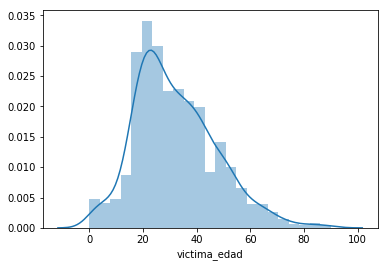

In [12]:
sns.distplot(df.victima_edad[df.victima_edad<100]);

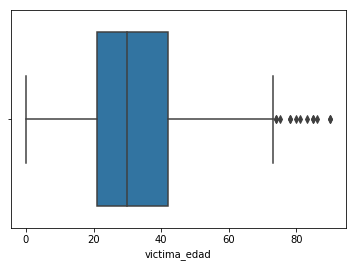

In [13]:
sns.boxplot(df.victima_edad[df.victima_edad<100]);

In [14]:
df.victima_edad[df.victima_edad<100].describe()

count    1177.000000
mean       32.146984
std        15.204769
min         0.000000
25%        21.000000
50%        30.000000
75%        42.000000
max        90.000000
Name: victima_edad, dtype: float64

Es importante resaltar que el foco de la investigación está puesto en los hechos de violencia acaecidos, no en predecir la edad de las víctimas. Por lo que, para evitar eliminar los registros con edades anormales/faltantes, se hace el supuesto que tales edades siguen la misma distribución que la población total, entonces se procede a inferir el valor de la variable **edad** a través de la distribución de probabilidad discreta de la población total.

In [15]:
# cantidad de edades faltantes
b = len(df[df.victima_edad.isna()==True])
b

54

In [16]:
# cantidad de edades anormales
c = len((df[df.victima_edad>100]) |  (df[df.victima_edad<0]) )
c

2

In [17]:
edades_a_completar = b+c

In [18]:
prueba = pd.DataFrame(df.victima_edad[(df.victima_edad<=100) & (df.victima_edad.isna()==False) & (df.victima_edad>=0)].value_counts(normalize=True).sort_index())
prueba.index.names = ['edad']
prueba.rename(columns={'victima_edad': 'probabilidad'}, inplace=True)
prueba.head(5)

,probabilidad
edad,
0.0,0.001699
1.0,0.003398
2.0,0.004248
3.0,0.009346
4.0,0.004248


controlamos que se encuentren todos los valores en el rango de edades de 0 a 100. es importante señalar que se asume que los valores iguales a 0 se tratan de personas menores recién nacidos, dado que la documentación del data set no lo especifica.

In [19]:
edades = pd.Series(prueba.index)
print(' Minimo: ', edades.min() , '; Maximo: ', edades.max() ,
      '\n Diferencia entre minimo y maximo: ', (edades.max()- edades.min()),
      '\n Total de valores :', edades.count())


 Minimo:  0.0 ; Maximo:  90.0 
 Diferencia entre minimo y maximo:  90.0 
 Total de valores : 82


Tal como podemos apreciar, la diferencia entre el valor máximo y mínimo de edades es igual 90, mientras que el total de valores en la distribución de edades es igual a 82, esto implica que existen edades para las cuales no hay víctimas dentro del data set. sin embargo, se sabe que la edad de la victimas varía entre 0 y 90, y que cualquiera de los registros de victimas con edad nula, pueden haber tenido cualquier edad dentro de ese rango, por lo que si se toma está distribución de probabilidad para inferir los valores faltantes, habremos omitido ciertos valores posibles de edad.
</p> por los motivos expuestos, debemos buscar otra forma de inferir los valores de edad faltantes. para ello utilizamos lista completa de distribuciones que nos provee la librería scipy.stats, para buscar el modelo de distribución de probabilidad que mejor se adapte a la distribución de la población (con la menor suma residual de cuadrados) , bajo el supuesto que la variable edad es una variable continua.(1)<p>
</p>*(1) https://stackoverflow.com/a/37616966/11009907<p>

In [20]:
%matplotlib inline

import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels as sm
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (8, 6)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf


In [21]:
# cargamos la informacion sobre las edades
data = df.victima_edad[(df.victima_edad<=100) & (df.victima_edad.isna()==False) & (df.victima_edad>=0)]

In [22]:
data.describe()

count    1177.000000
mean       32.146984
std        15.204769
min         0.000000
25%        21.000000
50%        30.000000
75%        42.000000
max        90.000000
Name: victima_edad, dtype: float64

C:\Users\Pc\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\Users\Pc\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0, 0.5, 'Probabilidad')

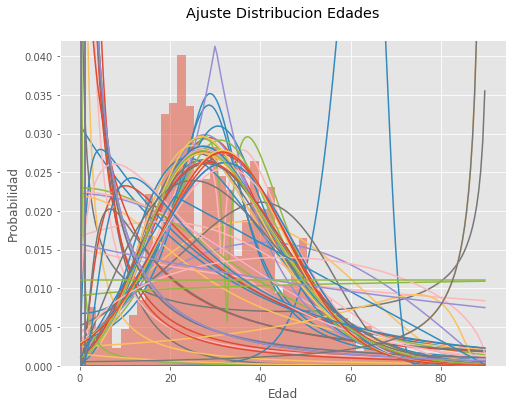

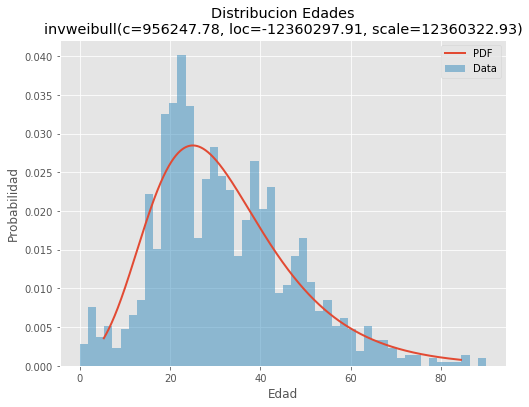

In [23]:
# Plot for comparison
plt.figure(figsize=(8,6))
ax = data.plot(kind='hist', bins=50, normed=True, alpha=0.5)
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'Ajuste Distribucion Edades\n')
ax.set_xlabel(u'Edad')
ax.set_ylabel('Probabilidad')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(8,6))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, normed=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u'Distribucion Edades\n' + dist_str)
ax.set_xlabel(u'Edad')
ax.set_ylabel('Probabilidad')

La distribución obtenida es la transformación inversa de la distribución de Weibull, y sus parámetros son:

In [24]:
dist_str

'invweibull(c=956247.78, loc=-12360297.91, scale=12360322.93)'

ahora pasamos a crear edades con la generación de números pseudoaleatorios, utilizando la distribución obtenida

In [25]:
edad_aleatoria = st.invweibull.rvs(c=best_fit_params[0],loc=best_fit_params[1], scale=best_fit_params[2], size= edades_a_completar)

C:\Users\Pc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


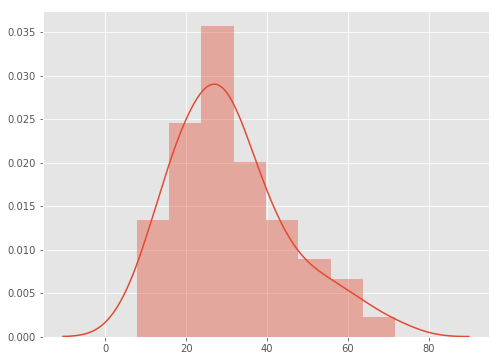

In [26]:
# observamos las edades creadas
plt.figure(figsize=(8,6))
sns.distplot(edad_aleatoria);

In [27]:
# observamos los valores estadisticos de las edades creadas a fin de compararlos con los de la poblacion
edad_aleatoria = pd.DataFrame(edad_aleatoria)
edad_aleatoria.columns = ['edad']
edad_aleatoria.describe()

,edad
count,56.000000
mean,30.952985
std,14.281459
min,7.671338
25%,20.275569
50%,28.193214
75%,37.550237
max,71.696592


debemos asegurarnos que no se hayan creado valores menores a 0, y como se ha dicho anteriormente que tampoco sean mayores a 100 (ya que son valores que pertenecen a la función de densidad del modelo propuesto), ya que son valores de edad considerados anormales (>100) o imposibles (<0). si esto ocurre, generamos un nuevo valor aleatorio hasta que todos los valores de edades aleatorias pertenezcan al rango (0,100)

In [28]:
# creamos un filtro de las edades aleatorias que no estan dentro del rango (0,100)

# mientras existan valores dentro de ese filtro se generan nuevos valores aleatorios con la misma distribucion anterior

while len(edad_aleatoria[(edad_aleatoria.edad<0) | (edad_aleatoria.edad>100) ]) > 0: 

    for indice_fila, fila in edad_aleatoria[(edad_aleatoria.edad<0) | (edad_aleatoria.edad>100) ].iterrows():
        edad_aleatoria.edad.loc[indice_fila] =  st.invweibull.rvs(c=best_fit_params[0],loc=best_fit_params[1], scale=best_fit_params[2])

edad_aleatoria.describe()

,edad
count,56.000000
mean,30.952985
std,14.281459
min,7.671338
25%,20.275569
50%,28.193214
75%,37.550237
max,71.696592


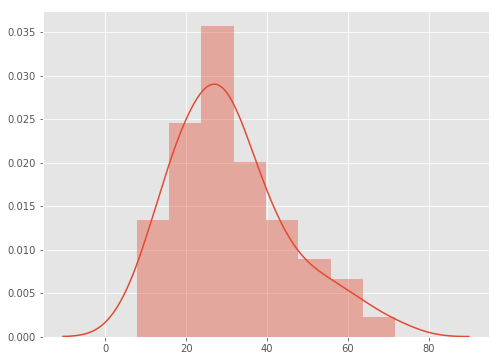

In [29]:
plt.figure(figsize=(8,6))
sns.distplot(edad_aleatoria);

recordemos que la variable original de **edad** es una variable discreta, por lo que a los efectos de utilizar los valores aleatorios obtenidos, tomamos la parte entera de los valores aleatorios generados

In [30]:
edad_aleatoria = edad_aleatoria.round({'edad':0})
edad_aleatoria.sample(2)

,edad
33,42.0
49,20.0


In [31]:
# creamos un data set con las edades faltantes y/o anormales
edad_faltante = df[(df.victima_edad>100) | (df['victima_edad'].isna()==True) | (df.victima_edad<0) ]
print(len(edad_faltante)) # cantidad de edades faltantes y/o anormales
edad_faltante.sample(1)

56


,caso_numero,victima_edad,victima_identidad_genero,victima_tipo,province,hecho_modalidad_comisiva,hecho_fecha,hecho_provincia_indec_id
index,,,,,,,,
844,1064,NaN,MUJER,VINCULADO,Santa Fe,DISPARO DE BALA,2017-12-29,82.0


In [32]:
# obtenemos el indice 
indice = edad_faltante.index.tolist()
edad_aleatoria.index = indice
edad_aleatoria.head()

,edad
8,16.0
9,19.0
28,43.0
30,16.0
34,34.0


In [33]:
# agregamos las edades creadas
df.victima_edad[(df.victima_edad>100) | (df['victima_edad'].isna()==True) | (df.victima_edad<0)] = edad_aleatoria.edad

C:\Users\Pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


ahora podemos observar la **distribución final** de las edades data set, donde se puede observar que no existen diferencias considerables respecto a la distribución original

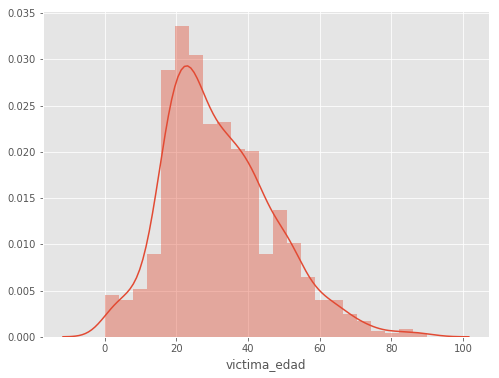

In [34]:
sns.distplot(df.victima_edad);

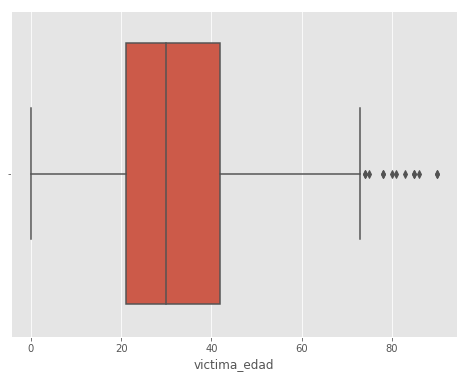

In [35]:
sns.boxplot(df.victima_edad);

In [36]:
df.victima_edad.describe()

count    1233.000000
mean       32.094079
std        15.158874
min         0.000000
25%        21.000000
50%        30.000000
75%        42.000000
max        90.000000
Name: victima_edad, dtype: float64

seguimos ahora con los demás valores faltantes, en este caso la variable **province**. esta variable presenta una particularidad, ya que la variable **hecho_provincia_indec_id** está relacionada a esta.
debemos saber si la totalidad de los valores faltantes en *provincia*, tienen su correspondiente con los valores faltantes en *hecho_provincia_indec_id*

In [37]:
df.isna().sum()

caso_numero                   0
victima_edad                  0
victima_identidad_genero     64
victima_tipo                  0
province                     58
hecho_modalidad_comisiva    119
hecho_fecha                   0
hecho_provincia_indec_id     62
dtype: int64

In [38]:
len(df[(df.province.isna()==True) | (df.hecho_provincia_indec_id.isna()==True)])

62

observamos que todos los registros de las *provincias (province)* con valores faltantes también presentan valores faltantes en *hecho_provincia_indec_id*.

entonces lo que haremos será completar la columna **hecho_provincia_indec_id** de acuerdo al valor de  **province**, al cual obtenemos desde https://es.wikipedia.org/wiki/Anexo:Provincias_de_Argentina_por_superficie,_poblaci%C3%B3n_y_densidad_(2010)

a esto lo hacemos para luego poder cruzar la informacion dentro de **Tableau** con el data frame anterior, donde tenemos la poblacion de cada una de las provincias

y a los valores faltantes en ambas ( **province** ***y*** **hecho_provincia_indec_id** ) los dejaremos tal cual están.

In [39]:
df_codigo_prov_nan = df[(df.province.isna()==False) & (df.hecho_provincia_indec_id.isna()==True)]
df_codigo_prov_nan

,caso_numero,victima_edad,victima_identidad_genero,victima_tipo,province,hecho_modalidad_comisiva,hecho_fecha,hecho_provincia_indec_id
index,,,,,,,,
15,20,34.0,MUJER,PRINCIPAL,Córdoba,ACUCHILLAMIENTO,2014-09-13,NaN
107,138,41.0,MUJER,PRINCIPAL,Córdoba,ACUCHILLAMIENTO,nan,NaN
161,182,39.0,MUJER,PRINCIPAL,Neuquen,DISPARO DE BALA,nan,NaN
1172,890,40.0,MUJER,PRINCIPAL,Mendoza,DESCUARTIZAMIENTO,nan,NaN


In [40]:
df2 = pd.read_csv('provincias.csv', encoding='latin-1', sep=';')
df2

,Country,Province,Capital,Población,Superficie,Densidad,Código
0,Argentina,Buenos Aires,La Plata,15625084,307571,"50,8",6
1,Argentina,Catamarca,San Fernando del Valle de Catamarca,367828,102602,"3,6",10
2,Argentina,Chaco,Resistencia,1055259,99633,"10,6",22
3,Argentina,Chubut,Rawson,509108,224686,"2,3",26
4,Argentina,Córdoba,Córdoba,3308876,165321,20,14
5,Argentina,Corrientes,Corrientes,992595,88199,"11,3",18
6,Argentina,Entre Ríos,Paraná,1235994,78781,"15,7",30
7,Argentina,Formosa,Formosa,530162,72066,"7,4",34
8,Argentina,Jujuy,San Salvador de Jujuy,673307,53219,"12,7",38
9,Argentina,La Pampa,Santa Rosa,318951,143440,"2,2",42


veamos las provincias que no poseen codigo

In [41]:
df[(df.province.isna()==False) & (df.hecho_provincia_indec_id.isna()==True)].groupby(['province']).count()

,caso_numero,victima_edad,victima_identidad_genero,victima_tipo,hecho_modalidad_comisiva,hecho_fecha,hecho_provincia_indec_id
province,,,,,,,
Córdoba,2,2,2,2,2,2,0
Mendoza,1,1,1,1,1,1,0
Neuquen,1,1,1,1,1,1,0


entonces donde existan estos valores en la columna **province** , debemos asignar el codigo correspondiente en **hecho_provincia_indec_id**

consultamos los codigos correspondientes en el *df2*

In [42]:
codigo_prov = df2[['Province','Código']].groupby(['Province']).first()
codigo_prov 

,Código
Province,
Buenos Aires,6
Catamarca,10
Chaco,22
Chubut,26
Corrientes,18
Córdoba,14
Entre Ríos,30
Formosa,34
Jujuy,38


como se puede observar la provincia de *Neuquén* no posee tilde en **é**, por lo que hay que normalizar los datos de esta columna 

In [43]:
df.province[(df.province=='Neuquén') | (df.province=='Neuquen')] = 'Neuquén'
df.province.unique()

C:\Users\Pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


array(['Río Negro', 'Córdoba', 'Santa Fe', nan, 'Neuquén', 'Buenos Aires',
       'Entre Ríos', 'Salta', 'Ciudad Autónoma de Bs.As.', 'Mendoza',
       'Corrientes', 'Chaco', 'Misiones', 'Formosa',
       'Santiago del Estero', 'Catamarca', 'Chubut', 'Tucumán', 'Jujuy',
       'La Pampa', 'Santa Cruz', 'San Luis', 'Tierra del Fuego',
       'San Juan', 'La Rioja'], dtype=object)

creamos un diccionario con los valores a completar

In [44]:
dic = dict(zip(df2.Province.values, df2.Código.values))
dic

{'Buenos Aires': 6,
 'Catamarca': 10,
 'Chaco': 22,
 'Chubut': 26,
 'Córdoba': 14,
 'Corrientes': 18,
 'Entre Ríos': 30,
 'Formosa': 34,
 'Jujuy': 38,
 'La Pampa': 42,
 'La Rioja': 46,
 'Mendoza': 50,
 'Misiones': 54,
 'Neuquén': 58,
 'Río Negro': 62,
 'Salta': 66,
 'San Juan': 70,
 'San Luis': 74,
 'Santa Cruz': 78,
 'Santa Fe': 82,
 'Santiago del Estero': 86,
 'Tierra del Fuego': 94,
 'Tucumán': 90}

In [45]:
# hacemos un mapeo
df_codigo_prov_nan['hecho_provincia_indec_id'] = df['province'].map(dic)
df_codigo_prov_nan

C:\Users\Pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,caso_numero,victima_edad,victima_identidad_genero,victima_tipo,province,hecho_modalidad_comisiva,hecho_fecha,hecho_provincia_indec_id
index,,,,,,,,
15,20,34.0,MUJER,PRINCIPAL,Córdoba,ACUCHILLAMIENTO,2014-09-13,14.0
107,138,41.0,MUJER,PRINCIPAL,Córdoba,ACUCHILLAMIENTO,nan,14.0
161,182,39.0,MUJER,PRINCIPAL,Neuquen,DISPARO DE BALA,nan,58.0
1172,890,40.0,MUJER,PRINCIPAL,Mendoza,DESCUARTIZAMIENTO,nan,50.0


In [46]:
# y se lo asignamos a las variables nan
df.hecho_provincia_indec_id[(df.hecho_provincia_indec_id.isna()==True)]= df_codigo_prov_nan.hecho_provincia_indec_id

C:\Users\Pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


comprobamos ahora que el total **province** faltantes es igual a **hecho_provincia_indec_id** faltante

In [47]:
df.isna().sum()

caso_numero                   0
victima_edad                  0
victima_identidad_genero     64
victima_tipo                  0
province                     58
hecho_modalidad_comisiva    119
hecho_fecha                   0
hecho_provincia_indec_id     58
dtype: int64

a los efectos del analisis, vamos a tomar a **Ciudad Autonoma de Bs. As** como equivalente de **Buenos Aires**.

In [48]:
df.hecho_provincia_indec_id[(df.province=='Ciudad Autónoma de Bs.As.')] = 6
df.province[(df.province=='Ciudad Autónoma de Bs.As.')] = 'Buenos Aires'

C:\Users\Pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


ahora pasaremos a trabajar con los valores faltantes sobre la variable **victima_identidad_genero**.

veamos la como se distribuye esta variable

In [49]:
c = pd.DataFrame(df.victima_identidad_genero[(df.victima_identidad_genero.isna()==False)].value_counts(normalize=True).sort_index())
c

,victima_identidad_genero
HOMBRE,0.038494
MUJER,0.934987
TRANSGENERO,0.026518


In [50]:
# buscamos los valores faltantes
d = df[df.victima_identidad_genero.isna()==True]
d.head(5)

,caso_numero,victima_edad,victima_identidad_genero,victima_tipo,province,hecho_modalidad_comisiva,hecho_fecha,hecho_provincia_indec_id
index,,,,,,,,
23,90,43.0,NaN,PRINCIPAL,Buenos Aires,ACUCHILLAMIENTO,2015-05-29,6.0
45,215,17.0,NaN,PRINCIPAL,Misiones,DISPARO DE BALA,2014-03-09,54.0
52,79,20.0,NaN,PRINCIPAL,Chubut,APUÑALAMIENTO,2013-01-27,26.0
67,114,36.0,NaN,PRINCIPAL,Entre Ríos,DISPARO DE BALA,2014-07-03,30.0
78,115,38.0,NaN,PRINCIPAL,Entre Ríos,ACUCHILLAMIENTO,2014-07-31,30.0


a continuación, completamos los valores faltantes generando una variable aleatoria que respete la distribución de probabilidad expuesta anteriormente

In [51]:
# generamos un array con valores aleatorios que siguen la misma distribucion de probabilidad de la poblacion
elements = c.index
probabilities = c['victima_identidad_genero'].values
e = {'genero_aleatorio':np.random.choice(elements, d.caso_numero.count(), p=probabilities)}

In [52]:
# observamos los valores generados 
f = pd.DataFrame(e, index=d.index)
f.head()

,genero_aleatorio
index,
23,MUJER
45,MUJER
52,MUJER
67,MUJER
78,MUJER


In [53]:
# asignamos los nuevos valores
df.victima_identidad_genero[df.victima_identidad_genero.isna()==True] = f.genero_aleatorio

C:\Users\Pc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [54]:
# podemos observar pequeñas diferencias respecto a los valores originales, pero que no modifican el analisis
pd.DataFrame(df.victima_identidad_genero[(df.victima_identidad_genero.isna()==False)].value_counts(normalize=True).sort_index())

,victima_identidad_genero
HOMBRE,0.038929
MUJER,0.935118
TRANSGENERO,0.025953


ahora controlamos nuevamente los valores faltantes

In [55]:
df.isna().sum()

caso_numero                   0
victima_edad                  0
victima_identidad_genero      0
victima_tipo                  0
province                     58
hecho_modalidad_comisiva    119
hecho_fecha                   0
hecho_provincia_indec_id     58
dtype: int64

antes de continuar, debemos ver si las **fechas** son correctas, para eso primeros examinamos que se encuentre dentro del rango 2012-01-01 a 2019-01-31, de acuerdo a lo descripto en la documentación del data set

In [56]:
df[(df.hecho_fecha<'2012-01-01') | (df.hecho_fecha>'2019-01-31') | (df.hecho_fecha.isna()==True) | (df.hecho_fecha=='nan') ].sort_values(by =['hecho_fecha'], ascending=True).sample(10)

,caso_numero,victima_edad,victima_identidad_genero,victima_tipo,province,hecho_modalidad_comisiva,hecho_fecha,hecho_provincia_indec_id
index,,,,,,,,
531,672,24.0,HOMBRE,VINCULADO,NaN,NaN,nan,NaN
1099,432,32.0,MUJER,PRINCIPAL,NaN,NaN,nan,NaN
356,504,26.0,MUJER,PRINCIPAL,Chaco,QUEMADURAS,nan,22.0
107,138,41.0,MUJER,PRINCIPAL,Córdoba,ACUCHILLAMIENTO,nan,14.0
1214,797,33.0,MUJER,PRINCIPAL,NaN,NaN,nan,NaN
372,522,26.0,TRANSGENERO,PRINCIPAL,Santa Cruz,NaN,nan,78.0
1090,419,22.0,MUJER,PRINCIPAL,NaN,NaN,nan,NaN
381,531,35.0,MUJER,PRINCIPAL,NaN,NaN,nan,NaN
526,672,70.0,HOMBRE,VINCULADO,NaN,NaN,nan,NaN


debido a que considero relevante para el analisis la fecha del hecho, solo nos quedaremos con los registros que estan dentro del rango mencionado anteriormente

In [57]:
df = df[(df.hecho_fecha>='2012-12-01') & (df.hecho_fecha<='2019-01-31')].sort_values(by =['hecho_fecha'], ascending=True)
df.sample(10)

,caso_numero,victima_edad,victima_identidad_genero,victima_tipo,province,hecho_modalidad_comisiva,hecho_fecha,hecho_provincia_indec_id
index,,,,,,,,
581,723,18.0,MUJER,PRINCIPAL,Tucumán,NaN,2016-09-18,90.0
1133,462,21.0,MUJER,PRINCIPAL,Salta,ESTRANGULAMIENTO,2013-07-08,66.0
728,515,16.0,MUJER,PRINCIPAL,Salta,ESTRANGULAMIENTO,2014-05-12,66.0
742,941,52.0,MUJER,PRINCIPAL,San Juan,ACUCHILLAMIENTO,2017-06-02,70.0
1221,1034,19.0,MUJER,PRINCIPAL,Buenos Aires,DISPARO DE BALA,2017-12-06,6.0
387,533,41.0,MUJER,PRINCIPAL,Buenos Aires,QUEMADURAS,2015-09-05,6.0
968,1170,25.0,MUJER,PRINCIPAL,Buenos Aires,DISPARO DE BALA,2017-10-07,6.0
837,1058,23.0,MUJER,PRINCIPAL,Santa Fe,AHORCAMIENTO,2018-01-06,82.0
1041,1243,39.0,MUJER,PRINCIPAL,Mendoza,DEGOLLAMIENTO,2018-11-05,50.0


In [58]:
df.isna().sum()

caso_numero                  0
victima_edad                 0
victima_identidad_genero     0
victima_tipo                 0
province                    35
hecho_modalidad_comisiva    95
hecho_fecha                  0
hecho_provincia_indec_id    35
dtype: int64

adicionalmente, vamos a crear una nueva variable categorica, que será el dia de la semana que corresponde con la fecha del registro

In [59]:
# importamos la funcion correspondiente, que nos informa el dia de la semana (idioma ingles)
import datetime as dt 
df['hecho_fecha'] = pd.to_datetime(df['hecho_fecha'])
df['weekday'] = df[['hecho_fecha']].apply(lambda x: dt.datetime.strftime(x['hecho_fecha'], '%A'), axis=1)
df[['hecho_fecha','weekday']].head()

,hecho_fecha,weekday
index,,
801,2012-12-06,Thursday
1105,2012-12-16,Sunday
1092,2012-12-17,Monday
255,2012-12-30,Sunday
83,2012-12-30,Sunday


In [60]:
# cambiamos los tipos de datos
df.hecho_provincia_indec_id = df.hecho_provincia_indec_id.fillna(0.0).astype(int)

In [61]:
# vemos los tipos de datos
df.dtypes

caso_numero                          int64
victima_edad                       float64
victima_identidad_genero            object
victima_tipo                        object
province                            object
hecho_modalidad_comisiva            object
hecho_fecha                 datetime64[ns]
hecho_provincia_indec_id             int32
weekday                             object
dtype: object

**estamos en condiciones de afirmar que el data set está listo para el análisis, si bien existen provincias con valores nulos, al igual que en el caso de la modalidad comisiva, son variables que las dejaremos como nulas ya que interesa analizar otros aspectos de los registros, y en otros casos estas no serán tenidas en cuenta.**

guardamos el data set con los cambios realizados

In [62]:
df.to_csv('df.csv')

****
****
****

A continuación, se utiliza el data set para efectuar un análisis visual que nos permita comprender mejor la violencia de género en argentina.

Para ello se utilizó **Tableau Public** como herramienta ( se podría haber continuado con el uso de librerías como Seaborn, pero a los efectos de interactuar con distintas herramientas, se optó por utilizar Tableau)

***
Para acceder a la publicacion: 

####  https://public.tableau.com/views/HerramientasparaelAnalisisdeDatos/Historia1?:embed=y&:display_count=yes&publish=yes

***



****

In [63]:
%%HTML
<div class='tableauPlaceholder' id='viz1549400462660' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;He&#47;HerramientasparaelAnalisisdeDatos&#47;Historia1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='HerramientasparaelAnalisisdeDatos&#47;Historia1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;He&#47;HerramientasparaelAnalisisdeDatos&#47;Historia1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1549400462660');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1016px';vizElement.style.height='991px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

****